# Предсказание оттока пользователей


### Подключение библиотек и обработка данных

Text(0.5, 1.0, 'MonthlySpending')

Text(0.5, 0, 'Board')

Text(0, 0.5, 'Difference between medians')

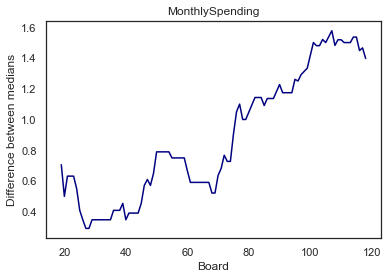

Text(0.5, 1.0, 'ClientPeriod')

Text(0.5, 0, 'Board')

Text(0, 0.5, 'Difference between medians')

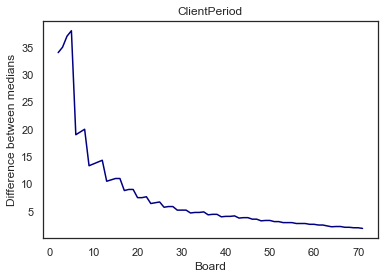

In [8]:
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.metrics import r2_score


import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import cufflinks as cf 
cf.go_offline()
init_notebook_mode(connected=True)


from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import SVG
from graphviz import Source
from IPython.display import display

import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import mean_squared_error,r2_score 

import warnings
warnings.filterwarnings('ignore')
breast_cancer = load_breast_cancer()

import pandas as pd
import numpy as np
import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score
sns.set(style='white', context='notebook', palette='deep')
pd.options.display.max_columns = 100



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import numpy as np
from sklearn.linear_model import LinearRegression
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000
df = pd.read_csv('DLS_train.csv')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


two_option_cols = []
df =df.applymap(lambda x: float(x) if str(x).replace('.', '', 1).isdigit() else x)
df_numeric = df.select_dtypes(include=['int', 'float']).astype(float)
for col in df.columns:
    unique_vals = df[col].unique()  
    if len(unique_vals) == 2:
        two_option_cols.append(col)
        
for col in two_option_cols:
    if 'Male' in df[col].unique():
        df[col] = df[col].replace({'Male': 1, 'Female': 0})
    else:
        df[col] = df[col].replace({'Yes': 1, 'No': 0})
float_cols = list(set(df_numeric.columns) - set(two_option_cols))
for i in df_numeric.columns:
    globals()[f'df{i}'] = pd.DataFrame()
    for j in range(round(min(df[i])),round(max(df[i]))):
        x = np.arange(min(df[i]), max(df[i]))
        y = []
        if i not in two_option_cols:
                    a = df.where(df[i] < j).dropna()[df.columns[0]].median()
                    b = df.where(df[i] > j).dropna()[df.columns[0]].median()
        new_row = {'lower_median': a, "upper_median": b, 'board': j}
        globals()[f'df{i}'] = globals()[f'df{i}'].append(new_row, ignore_index=True)
        globals()[f'df{i}'].dropna(inplace = True)
        globals()[f'df{i}'] = globals()[f'df{i}'].where(globals()[f'df{i}']['lower_median'] > 0)
        globals()[f'df{i}'] = globals()[f'df{i}'].where(globals()[f'df{i}']['upper_median'] > 0)
        #globals()[f'df{i}']['difference'] = (globals()[f'df{i}']['upper_median'] - globals()[f'df{i}']['lower_median'])/globals()[f'df{i}']['lower_median']
        #y.append(-(df.where(df[i] < j).dropna()[df.columns[0]].median() - df.where(df[i] > j).dropna()[df.columns[0]].median())/df.where(df[i] < j).dropna()[df.columns[0]].median())
for i in float_cols:
    globals()[f'df{i}']['difference'] = (globals()[f'df{i}']['upper_median'] - globals()[f'df{i}']['lower_median'])/globals()[f'df{i}']['lower_median']
    plt.plot(globals()[f'df{i}']['board'], (globals()[f'df{i}']['upper_median'] - globals()[f'df{i}']['lower_median'])/globals()[f'df{i}']['lower_median'],color ="Navy")
    plt.title(f'{i}')
    plt.xlabel('Board')
    plt.ylabel('Difference between medians')
    plt.show()

### Для оценки влияния числовых непрерывных переменных (доход, траты и тд) также посмотрим на разницу медиан Client period в двух группах: с меньшим и большим значением непрерывной переменной


In [9]:
two_option_cols = []
df =df.applymap(lambda x: float(x) if str(x).replace('.', '', 1).isdigit() else x)
df_numeric = df.select_dtypes(include=['int', 'float']).astype(float)
for col in df.columns:
    unique_vals = df[col].unique()  
    if len(unique_vals) == 2:
        two_option_cols.append(col)
        
for col in two_option_cols:
    if 'Male' in df[col].unique():
        df[col] = df[col].replace({'Male': 1, 'Female': 0})
    else:
        df[col] = df[col].replace({'Yes': 1, 'No': 0})
float_cols = list(set(df_numeric.columns) - set(two_option_cols))



df['HasInternetService'].replace({'Fiber optic': 2,'DSL': 2}, inplace= True)
df['TotalSpent'] = pd.to_numeric(df['TotalSpent'], errors='coerce')
df_numeric = df.select_dtypes(include=['int', 'float']).astype(float)
float_cols = list(set(df_numeric.columns) - set(two_option_cols) )
three_option_cols = []
for col in df.columns:
    unique_vals = df[col].unique()  
    if len(unique_vals) == 3:
        three_option_cols.append(col)
df['HasInternetService'].replace({'Fiber optic': 2,'DSL': 2}, inplace= True)
for col in three_option_cols:
    df[col] = df[col].replace({'Yes': 2, 'No': 1})
df['HasInternetService'].replace({'Fiber optic': 2,'DSL': 2}, inplace= True)
has = ['HasMultiplePhoneNumbers', 'HasInternetService',
       'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection',
       'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription',
       'HasContractPhone']
for col in has:
    df[col].replace({"No internet service": 0}, inplace= True)
df["HasMultiplePhoneNumbers"].replace({"No phone service": 0}, inplace= True)
df['HasContractPhone'].replace({"Month-to-month": 0, "One year": 1, "Two year": 2}, inplace= True)

Text(0.5, 1.0, 'ClientPeriod')

<AxesSubplot:title={'center':'ClientPeriod'}, ylabel='Frequency'>

Text(0.5, 1.0, 'MonthlySpending')

<AxesSubplot:title={'center':'MonthlySpending'}, ylabel='Frequency'>

Text(0.5, 1.0, 'TotalSpent')

<AxesSubplot:title={'center':'TotalSpent'}, ylabel='Frequency'>

Text(0.5, 1.0, 'Sex')

([<matplotlib.patches.Wedge at 0x24c70a15d00>,
 [Text(-0.009159362348197024, 1.0999618657396149, '1.0'),
  Text(0.009159362348196646, -1.0999618657396149, '0.0')],
 [Text(-0.004996015826289285, 0.5999791994943353, '50.3%'),
  Text(0.004996015826289079, -0.5999791994943353, '49.7%')])

Text(0.5, 1.0, 'IsSeniorCitizen')

([<matplotlib.patches.Wedge at 0x24c70a1b4c0>,
 [Text(-0.964919024239505, 0.5281394481201738, '0.0'),
  Text(0.964918974791517, -0.5281395384624107, '1.0')],
 [Text(-0.5263194677670027, 0.2880760626110039, '84.1%'),
  Text(0.5263194407953729, -0.2880761118885876, '15.9%')])

Text(0.5, 1.0, 'HasPartner')

([<matplotlib.patches.Wedge at 0x24c70a1b4f0>,
 [Text(-0.041861890518861924, 1.0992031578021357, '0.0'),
  Text(0.0418618905188613, -1.0992031578021357, '1.0')],
 [Text(-0.022833758464833775, 0.5995653588011649, '51.2%'),
  Text(0.022833758464833435, -0.5995653588011649, '48.8%')])

Text(0.5, 1.0, 'HasChild')

([<matplotlib.patches.Wedge at 0x24c70a3c490>,
 [Text(-0.6351846285271063, 0.8980759921537164, '0.0'),
  Text(0.6351845444431607, -0.8980760516239894, '1.0')],
 [Text(-0.34646434283296706, 0.48985963208384525, '69.6%'),
  Text(0.3464642969689968, -0.489859664522176, '30.4%')])

Text(0.5, 1.0, 'HasPhoneService')

([<matplotlib.patches.Wedge at 0x24c70a48490>,
 [Text(-1.0476082428963913, 0.3354354921822308, '1.0'),
  Text(1.047608258599259, -0.3354354431401494, '0.0')],
 [Text(-0.5714226779434861, 0.18296481391758043, '90.1%'),
  Text(0.5714226865086867, -0.18296478716735418, '9.9%')])

Text(0.5, 1.0, 'HasMultiplePhoneNumbers')

([<matplotlib.patches.Wedge at 0x24c70a485e0>,
 [Text(0.08496786519929957, 1.0967134821289806, '1'),
  Text(-0.4153543341151464, -1.0185680031945652, '2'),
  Text(1.047608195787775, -0.33543563930847126, '0')],
 [Text(0.04634610829052704, 0.5982073538885349, '47.5%'),
  Text(-0.22655690951735255, -0.5555825471970355, '42.6%'),
  Text(0.5714226522478772, -0.18296489416825704, '9.9%')])

Text(0.5, 1.0, 'HasInternetService')

([<matplotlib.patches.Wedge at 0x24c70a483d0>,
 [Text(-0.8562724138439828, 0.6905052883865549, '2'),
  Text(0.8562724461688671, -0.6905052483015497, 'No')],
 [Text(-0.467057680278536, 0.3766392482108481, '78.4%'),
  Text(0.4670576979102911, -0.37663922634629976, '21.6%')])

Text(0.5, 1.0, 'HasOnlineSecurityService')

([<matplotlib.patches.Wedge at 0x24c7013b220>,
 [Text(0.018972287490136876, 1.0998363752428775, '1'),
  Text(-0.7051711635185708, -0.8442355300162777, '2'),
  Text(0.8562724461688671, -0.6905052483015497, '0')],
 [Text(0.010348520449165568, 0.5999107501324786, '49.5%'),
  Text(-0.3846388164646749, -0.46049210728160594, '28.9%'),
  Text(0.4670576979102911, -0.37663922634629976, '21.6%')])

Text(0.5, 1.0, 'HasOnlineBackup')

([<matplotlib.patches.Wedge at 0x24c70a70640>,
 [Text(0.20102726101304613, 1.0814749374486645, '1'),
  Text(-0.8353620560017335, -0.7156606985105141, '2'),
  Text(0.8562724461688671, -0.6905052483015497, '0')],
 [Text(0.10965123327984333, 0.5898954204265442, '44.1%'),
  Text(-0.4556520305464, -0.39036038100573495, '34.2%'),
  Text(0.4670576979102911, -0.37663922634629976, '21.6%')])

Text(0.5, 1.0, 'HasDeviceProtection')

([<matplotlib.patches.Wedge at 0x24c70a97610>,
 [Text(0.21066761955548036, 1.0796384367327923, '1'),
  Text(-0.8417135647499299, -0.7081795499136966, '2'),
  Text(0.8562724461688671, -0.6905052483015497, '0')],
 [Text(0.11490961066662564, 0.5888936927633411, '43.9%'),
  Text(-0.45911648986359804, -0.3862797544983799, '34.5%'),
  Text(0.4670576979102911, -0.37663922634629976, '21.6%')])

Text(0.5, 1.0, 'HasTechSupportAccess')

([<matplotlib.patches.Wedge at 0x24c70a79e50>,
 [Text(0.02420530037523562, 1.099733651132739, '1'),
  Text(-0.7091802117308474, -0.8408706364770925, '2'),
  Text(0.8562724461688671, -0.6905052483015497, '0')],
 [Text(0.013202891113764883, 0.5998547187996758, '49.3%'),
  Text(-0.38682557003500767, -0.45865671080568676, '29.1%'),
  Text(0.4670576979102911, -0.37663922634629976, '21.6%')])

Text(0.5, 1.0, 'HasOnlineTV')

([<matplotlib.patches.Wedge at 0x24c6d994610>,
 [Text(0.34849390484764886, 1.0433369533779766, '1'),
  Text(-0.9262140009003823, -0.593403424776186, '2'),
  Text(0.8562724461688671, -0.6905052483015497, '0')],
 [Text(0.1900875844623539, 0.5690928836607144, '39.7%'),
  Text(-0.5052076368547539, -0.32367459533246506, '38.7%'),
  Text(0.4670576979102911, -0.37663922634629976, '21.6%')])

Text(0.5, 1.0, 'HasMovieSubscription')

([<matplotlib.patches.Wedge at 0x24c6c349190>,
 [Text(0.3596436215391238, 1.0395462786649874, '1'),
  Text(-0.9325137407996674, -0.5834536170252188, '2'),
  Text(0.8562724461688671, -0.6905052483015497, '0')],
 [Text(0.19616924811224934, 0.5670252429081749, '39.4%'),
  Text(-0.5086438586180003, -0.3182474274683011, '39.0%'),
  Text(0.4670576979102911, -0.37663922634629976, '21.6%')])

Text(0.5, 1.0, 'HasContractPhone')

([<matplotlib.patches.Wedge at 0x24c70042160>,
 [Text(-0.18169941215068605, 1.084889544434868, '0'),
  Text(-0.5056167674945121, -0.9769092508664254, '2'),
  Text(0.879971269716261, -0.6600383053080718, '1')],
 [Text(-0.09910877026401056, 0.5917579333281098, '55.3%'),
  Text(-0.2757909640879157, -0.5328595913816865, '24.2%'),
  Text(0.47998432893614235, -0.3600208938044028, '20.5%')])

Text(0.5, 1.0, 'IsBillingPaperless')

([<matplotlib.patches.Wedge at 0x24c70038070>,
 [Text(-0.32670075120036934, 1.050364993307143, '1.0'),
  Text(0.326700751200369, -1.050364993307143, '0.0')],
 [Text(-0.17820040974565599, 0.5729263599857143, '59.6%'),
  Text(0.1782004097456558, -0.5729263599857144, '40.4%')])

Text(0.5, 1.0, 'PaymentMethod')

([<matplotlib.patches.Wedge at 0x24c70038160>,
 [Text(0.5355843199806599, 0.9608066591103822, 'Electronic check'),
  Text(-1.0486011182882786, 0.33231866442403074, 'Mailed check'),
  Text(-0.5061978913326836, -0.9766082606707487, 'Bank transfer (automatic)'),
  Text(0.8554503357781398, -0.6915234797294074, 'Credit card (automatic)')],
 [Text(0.2921369018076327, 0.5240763595147538, '33.8%'),
  Text(-0.5719642463390611, 0.18126472604947128, '22.6%'),
  Text(-0.27610794072691824, -0.5326954149113174, '21.9%'),
  Text(0.46660927406080344, -0.37719462530694947, '21.6%')])

Text(0.5, 1.0, 'Churn')

([<matplotlib.patches.Wedge at 0x24c6f82de80>,
 [Text(-0.7478930722742168, 0.8066324766857788, '0.0'),
  Text(0.7478930722742166, -0.8066324766857789, '1.0')],
 [Text(-0.4079416757859364, 0.4399813509195156, '73.8%'),
  Text(0.4079416757859363, -0.4399813509195157, '26.2%')])

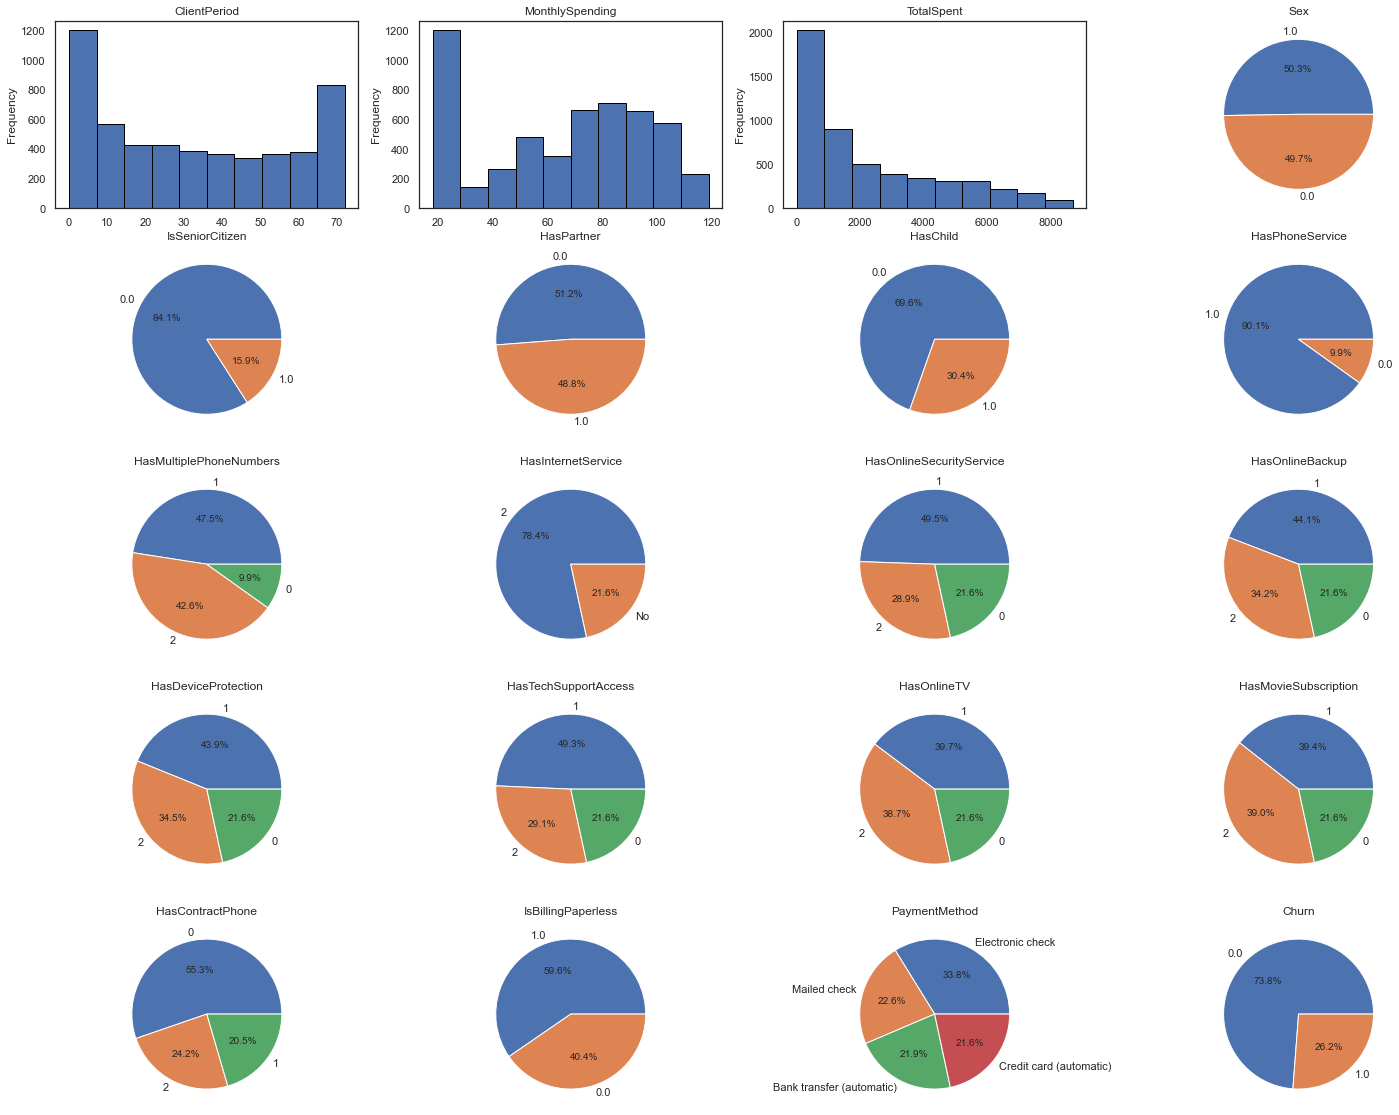

In [10]:
num_cols = [
    "ClientPeriod",
    "MonthlySpending",
    "TotalSpent",
]

cat_cols = [
    "Sex",
    "IsSeniorCitizen",
    "HasPartner",
    "HasChild",
    "HasPhoneService",
    "HasMultiplePhoneNumbers",
    "HasInternetService",
    "HasOnlineSecurityService",
    "HasOnlineBackup",
    "HasDeviceProtection",
    "HasTechSupportAccess",
    "HasOnlineTV",
    "HasMovieSubscription",
    "HasContractPhone",
    "IsBillingPaperless",
    "PaymentMethod",
]

target = 'Churn'

fig, axes = plt.subplots(5, 4, figsize=(25, 20))
for ax, col in zip(axes.flatten(), df.columns):
    ax.set_title(col)
    if col in cat_cols or col == target:
        ax.pie(df[col].value_counts(), autopct="%1.1f%%", labels=df[col].value_counts().index)
    else:
        df[col].plot(kind="hist", ec="black", ax=ax)

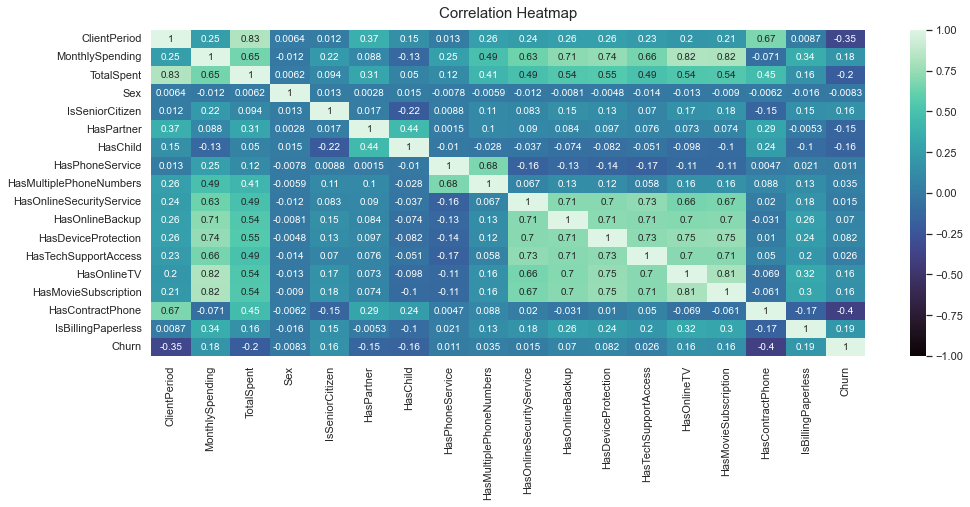

In [11]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='mako')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=12);

### Корреляция присутствует между переменными, показывающими наличие доступа к телефону, интерну и также между наличием ребёнка и партнёра

In [12]:
for i in list(set(df.columns) - set(float_cols)):
    l= []
    l = df[i].unique()
    print(i)
    print(l)
    print('----------')

HasInternetService
['No' 2]
----------
Churn
[0. 1.]
----------
IsSeniorCitizen
[0. 1.]
----------
HasDeviceProtection
[0 1 2]
----------
HasPhoneService
[1. 0.]
----------
HasPartner
[1. 0.]
----------
IsBillingPaperless
[0. 1.]
----------
HasMovieSubscription
[0 1 2]
----------
HasOnlineSecurityService
[0 1 2]
----------
HasContractPhone
[1 2 0]
----------
HasMultiplePhoneNumbers
[1 2 0]
----------
HasOnlineBackup
[0 1 2]
----------
HasChild
[1. 0.]
----------
HasTechSupportAccess
[0 2 1]
----------
Sex
[1. 0.]
----------
HasOnlineTV
[0 1 2]
----------
PaymentMethod
['Mailed check' 'Credit card (automatic)' 'Electronic check'
 'Bank transfer (automatic)']
----------


In [13]:
two_option_cols = []
df =df.applymap(lambda x: float(x) if str(x).replace('.', '', 1).isdigit() else x)
df_numeric = df.select_dtypes(include=['int', 'float']).astype(float)
for col in df.columns:
    unique_vals = df[col].unique()  
    if len(unique_vals) == 2:
        two_option_cols.append(col)
        
for col in two_option_cols:
    if 'Male' in df[col].unique():
        df[col] = df[col].replace({'Male': 1, 'Female': 0})
    else:
        df[col] = df[col].replace({'Yes': 1, 'No': 0})
float_cols = list(set(df_numeric.columns) - set(two_option_cols))



df['HasInternetService'].replace({'Fiber optic': 2,'DSL': 2}, inplace= True)
df['TotalSpent'] = pd.to_numeric(df['TotalSpent'], errors='coerce')
df_numeric = df.select_dtypes(include=['int', 'float']).astype(float)
float_cols = list(set(df_numeric.columns) - set(two_option_cols) )
three_option_cols = []
for col in df.columns:
    unique_vals = df[col].unique()  
    if len(unique_vals) == 3:
        three_option_cols.append(col)
df['HasInternetService'].replace({'Fiber optic': 2,'DSL': 2}, inplace= True)
for col in three_option_cols:
    df[col] = df[col].replace({'Yes': 2, 'No': 1})
df['HasInternetService'].replace({'Fiber optic': 2,'DSL': 2}, inplace= True)
has = ['HasMultiplePhoneNumbers', 'HasInternetService',
       'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection',
       'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription',
       'HasContractPhone']
for col in has:
    df[col].replace({"No internet service": 0}, inplace= True)
df["HasMultiplePhoneNumbers"].replace({"No phone service": 0}, inplace= True)
df['HasContractPhone'].replace({"Month-to-month": 0, "One year": 1, "Two year": 2}, inplace= True)


### Реализация указанного выше изменения изначальных данных для x_test в виде функции. Изменения включают в себя изменение категориальных переменных на числовые и удаление колонки payment method. Последнее действие необходимо из-за выявленной нерепрезентативности данной переменной

In [14]:
x_t = pd.read_csv('x_DLS.csv')
def changer(x_t):
    two_option_cols = []
    x_t =x_t.applymap(lambda x: float(x) if str(x).replace('.', '', 1).isdigit() else x)
    x_t_numeric = x_t.select_dtypes(include=['int', 'float']).astype(float)
    for col in x_t.columns:
        unique_vals = x_t[col].unique()  
        if len(unique_vals) == 2:
            two_option_cols.append(col)

    for col in two_option_cols:
        if 'Male' in x_t[col].unique():
            x_t[col] = x_t[col].replace({'Male': 1, 'Female': 0})
        else:
            x_t[col] = x_t[col].replace({'Yes': 1, 'No': 0})
    float_cols = list(set(x_t_numeric.columns) - set(two_option_cols))
    x_t['HasInternetService'].replace({'Fiber optic': 2,'DSL': 2, 'No': 1}, inplace= True)
    x_t['TotalSpent'] = pd.to_numeric(x_t['TotalSpent'], errors='coerce')
    x_t_numeric = x_t.select_dtypes(include=['int', 'float']).astype(float)
    float_cols = list(set(x_t_numeric.columns) - set(two_option_cols) )
    three_option_cols = []
    for col in x_t.columns:
        unique_vals = x_t[col].unique()  
        if len(unique_vals) == 3:
            three_option_cols.append(col)

    for col in three_option_cols:
        x_t[col] = x_t[col].replace({'Yes': 2, 'No': 1})
    x_t['HasInternetService'].replace({'Fiber optic': 2,'DSL': 2, "No": 0}, inplace= True)
    has = ['HasMultiplePhoneNumbers', 'HasInternetService',
           'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection',
           'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription',
           'HasContractPhone']
    for col in has:
        x_t[col].replace({"No internet service": 0}, inplace= True)
    x_t["HasMultiplePhoneNumbers"].replace({"No phone service": 0}, inplace= True)
    x_t['HasContractPhone'].replace({"Month-to-month": 0, "One year": 1, "Two year": 2}, inplace= True)
    x_t = x_t.drop(columns = 'PaymentMethod', errors ='ignore' )
    x_t = x_t.fillna(x_t.median())
    return x_t


In [15]:
df= df.dropna()
x = df.drop(columns= ['Churn', 'PaymentMethod'])
df['Churn'].astype(float)
y = pd.DataFrame(df['Churn'])
y.astype(int)

0       0.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
5277    0.0
5278    0.0
5279    0.0
5280    0.0
5281    0.0
Name: Churn, Length: 5273, dtype: float64

,Churn
0,0
1,0
2,1
3,0
4,0
...,...
5277,0
5278,0
5279,0
5280,0


### Создание функции, которая даёт предикт для произвольного классификатора, имеющего метод grid_search

In [16]:
def pred(ml, params):
    clf = ml
    parametrs = {
        'n_estimators': range(10,30),
        'criterion': ['gini', 'entropy'],
        'max_depth': range(1,20),
    }

    grid_search_cv_clf = GridSearchCV(clf, params, cv=5, error_score='raise', scoring="roc_auc")
    grid_search_cv_clf.fit(changer(x),y)
    grid_search_cv_clf.best_params_
    clf = RandomForestClassifier(**grid_search_cv_clf.best_params_)
    clf.fit(changer(x),y)
    cv_results = cross_val_score(clf, changer(x), y, cv=5, scoring='roc_auc')

    y_predicted_proba = pd.DataFrame(clf.predict_proba(changer(x_t)))
    y_predicted_proba.rename(columns={0: "Churn"}, inplace=True)
    y_predicted_proba['Id'] = y_predicted_proba.index
    y_predicted_proba = y_predicted_proba[['Id', 'Churn']]
    prediction = y_predicted_proba.to_csv('prediction_rf.csv', index=False)
    return y_predicted_proba['Churn']

## Предсказание через RandomForest

In [17]:
p1 = pred(RandomForestClassifier(), {'n_estimators':range(10,15), 'max_depth': range(3,10), "criterion": ["gini" , "entropy"]})

## Предсказание через RandomForest

In [18]:
import xgboost as xgb
p2 = pred(xgb.XGBClassifier(),{'n_estimators':range(1,20),"max_depth": range(1,13)})

## Предсказание через градиентный бустинг xgb

In [19]:
from catboost import CatBoostClassifier
from catboost import CatBoostRegressor
cat = CatBoostRegressor()

from catboost import Pool, cv
grid = {'learning_rate': [0.05,0.06,0.07],
        'depth': [5,6,7],
        'l2_leaf_reg': [ 9,11,13],}

grid_search_result = cat.grid_search(grid, X=changer(x), y=y, plot=False)
cat.fit(changer(x),y,verbose=False, plot=False)


0:	learn: 0.5073038	test: 0.4808534	best: 0.4808534 (0)	total: 174ms	remaining: 2m 54s
1:	learn: 0.4978330	test: 0.4718359	best: 0.4718359 (1)	total: 182ms	remaining: 1m 31s
2:	learn: 0.4883054	test: 0.4624531	best: 0.4624531 (2)	total: 198ms	remaining: 1m 5s
3:	learn: 0.4795152	test: 0.4537375	best: 0.4537375 (3)	total: 254ms	remaining: 1m 3s
4:	learn: 0.4713722	test: 0.4459364	best: 0.4459364 (4)	total: 261ms	remaining: 51.9s
5:	learn: 0.4638136	test: 0.4384688	best: 0.4384688 (5)	total: 265ms	remaining: 43.8s
6:	learn: 0.4568464	test: 0.4318553	best: 0.4318553 (6)	total: 269ms	remaining: 38.1s
7:	learn: 0.4502675	test: 0.4253152	best: 0.4253152 (7)	total: 272ms	remaining: 33.7s
8:	learn: 0.4441838	test: 0.4193559	best: 0.4193559 (8)	total: 274ms	remaining: 30.2s
9:	learn: 0.4387854	test: 0.4144142	best: 0.4144142 (9)	total: 277ms	remaining: 27.4s
10:	learn: 0.4334805	test: 0.4093918	best: 0.4093918 (10)	total: 279ms	remaining: 25.1s
11:	learn: 0.4285467	test: 0.4044105	best: 0.40441

In [64]:
cat.fit(changer(x),y,verbose=False, plot=True)
y_predicted_proba = pd.DataFrame(cat.predict(changer(x_t)))
threshold =y.value_counts()[0]/(y.value_counts()[0]+y.value_counts()[1])
quantile = y_predicted_proba[0].quantile(q=threshold)
y_predicted_proba = pd.DataFrame(np.where(y_predicted_proba >= quantile, 1, 0))
y_predicted_proba.rename(columns={0: "Churn"}, inplace=True)
y_predicted_proba['Id'] = y_predicted_proba.index
y_predicted_proba = y_predicted_proba[['Id', 'Churn']]
prediction = y_predicted_proba.to_csv('prediction_rf.csv', index=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [60]:
y_predicted_proba = pd.DataFrame(cat.predict(changer(x_t)))
y_predicted_proba

,0
0,0.049535
1,0.820316
2,0.526795
3,0.010957
4,-0.005277
...,...
1756,0.270866
1757,0.014704
1758,0.841739
1759,0.471382


## Предсказание через catboost

In [62]:
p3 =1- y_predicted_proba[0]

In [22]:
from sklearn.pipeline import Pipeline

PARAMS = {
    "model__C": np.arange(2.05, 2.1, 0.01),
    "model__penalty": ["l1", "l2"],
    "model__class_weight": [None, "balanced"],
    "model__solver": ["saga", "lbfgs"],
    "model__max_iter": [1000, 2000],
}

clf = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(solver="saga", max_iter=1000, random_state=42)),
])
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=PARAMS,
    scoring="roc_auc",
    n_jobs=-1,
    cv=10,
    refit=True,
)
logreg = grid_search.fit(changer(x), y)
from sklearn.pipeline import Pipeline
logreg.best_estimator_.fit(changer(x), y)

y_predicted_proba = pd.DataFrame(logreg.predict_proba(changer(x_t)))
fun = pd.DataFrame(logreg.predict_proba(changer(x_t)))
y_predicted_proba.rename(columns={0: "Churn"}, inplace=True)
y_predicted_proba['Id'] = y_predicted_proba.index
y_predicted_proba = y_predicted_proba[['Id', 'Churn']]
prediction = y_predicted_proba.to_csv('prediction_rf.csv', index=False)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(C=2.0699999999999994, max_iter=1000,
                                    penalty='l1', random_state=42,
                                    solver='saga'))])

In [23]:
p4 = y_predicted_proba['Churn']

## Предсказание через лог.регрессию 

In [63]:
pred = []
predexp = []
for i in range(len(p1)):
    pred.append(p1[i]+ p2[i]+ p3[i]+p4[i])
    predexp.append(p1[i]+ p2[i]+ p3[i]+p4[i])
    
for i in range(len(p1)):
    pred[i] = (pred[i])/4
    predexp[i]= (predexp[i])/4
    
pred = pd.DataFrame(pred)

pred['Id'] =pred.index
pred.rename(columns={0: "Churn"}, inplace=True)
pred = pred[['Id', 'Churn']]
pred["Churn"] = 1 - pred["Churn"]
prediction = pred.to_csv('prediction_rf.csv', index=False)

In [29]:
pred = pd.DataFrame(p3)

pred['Id'] =pred.index
pred.rename(columns={0: "Churn"}, inplace=True)
pred = pred[['Id', 'Churn']]
pred["Churn"] = 1 - pred["Churn"]
prediction = pred.to_csv('prediction_rf.csv', index=False)

In [56]:
p4

0       0.954262
1       0.307126
2       0.330112
3       0.993777
4       0.996252
          ...   
1756    0.889412
1757    0.919642
1758    0.249891
1759    0.399827
1760    0.988885
Name: Churn, Length: 1761, dtype: float64

In [27]:
pred = []
predexp = []
for i in range(len(p1)):
    pred.append(p1[i]+ p2[i]+ p3[i]+p4[i])
    predexp.append(p1[i]+ p2[i]+ p3[i]+p4[i])

for i in range(len(p1)):
    pred[i] = (pred[i])/4
    predexp[i]= (predexp[i])/4

for i in range(len(p1)):
    pred[i] = round(pred[i])

pred = pd.DataFrame(pred)

pred['Id'] =pred.index
pred.rename(columns={0: "Churn"}, inplace=True)
pred = pred[['Id', 'Churn']]
prediction = pred.to_csv('prediction_rf.csv', index=False)

In [109]:
pred["Churn"] = 1 - pred["Churn"]

prediction = pred.to_csv('prediction_rf.csv', index=False)

In [98]:
p3

0       0.954262
1       0.307126
2       0.330112
3       0.993777
4       0.996252
          ...   
1756    0.889412
1757    0.919642
1758    0.249891
1759    0.399827
1760    0.988885
Name: Churn, Length: 1761, dtype: float64

# Нахождение доли экземпляров 1 типа в обучающей выборке

In [131]:
df["Churn"].value_counts()[1]/df["Churn"].value_counts()[0]

0.35587554641295965

In [119]:
for i in range(len(predexp)):
    predexp[i] = 1 - predexp[i]

# Нахождения такого порога перехода непрерывного предсказания в бинарное, чтобы доля классов первого типа среди ответов тестовой выборки была такой же, как в обучающей выборке 

In [122]:
for j in range(20,80, 1): 
    a = 0 
    b = 0
    for i in range(len(predexp)):
        if predexp[i] > j/100:
            a = a+1
        else: b = b+1
    print(a/b)
    print(j)
    print('-----------')
    

1.098927294398093
20
-----------
1.0381944444444444
21
-----------
0.9831081081081081
22
-----------
0.9501661129568106
23
-----------
0.8976293103448276
24
-----------
0.8420502092050209
25
-----------
0.8024564994882293
26
-----------
0.7787878787878788
27
-----------
0.7504970178926441
28
-----------
0.7130350194552529
29
-----------
0.6835564053537285
30
-----------
0.6597549481621112
31
-----------
0.6366171003717472
32
-----------
0.614115490375802
33
-----------
0.5822102425876011
34
-----------
0.5406824146981627
35
-----------
0.5128865979381443
36
-----------
0.4885883347421809
37
-----------
0.45778145695364236
38
-----------
0.4363784665579119
39
-----------
0.4110576923076923
40
-----------
0.39429928741092635
41
-----------
0.3736349453978159
42
-----------
0.3608964451313756
43
-----------
0.33814589665653494
44
-----------
0.32008995502248877
45
-----------
0.2996309963099631
46
-----------
0.2816593886462882
47
-----------
0.2623655913978495
48
-----------
0.2454031117

In [125]:
pred = []
for i in range(len(predexp)):
    if predexp[i]< 0.43:
        pred.append(0)
    else: pred.append(1) 
        

In [126]:

pred = pd.DataFrame(pred)

pred['Id'] =pred.index
pred.rename(columns={0: "Churn"}, inplace=True)
pred = pred[['Id', 'Churn']]
prediction = pred.to_csv('prediction_rf.csv', index=False)